In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
train = pd.read_csv(r'/kaggle/input/playground-series-s4e4/train.csv')
train = train.set_index("id")
test = pd.read_csv(r'/kaggle/input/playground-series-s4e4/test.csv')
#original = pd.read_csv(f'/kaggle/input/playgrounds4e04originaldata/Original.csv', index_col=0)

In [36]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = ohe.fit_transform(train[["Sex"]]).toarray()

ohe1 = OneHotEncoder(handle_unknown='ignore')
encoded_a_data = ohe1.fit_transform(test[["Sex"]]).toarray()

In [37]:
train[ohe.get_feature_names_out()] = encoded_data
test[ohe1.get_feature_names_out()] = encoded_a_data
test = test.drop('Sex', axis=1)
train = train.drop('Sex', axis=1)

In [38]:
train

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1.0,0.0,0.0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.0,0.0,0.0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.0,1.0,0.0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.0,0.0,1.0
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6,0.0,0.0,1.0
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9,0.0,0.0,1.0
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6,0.0,1.0,0.0


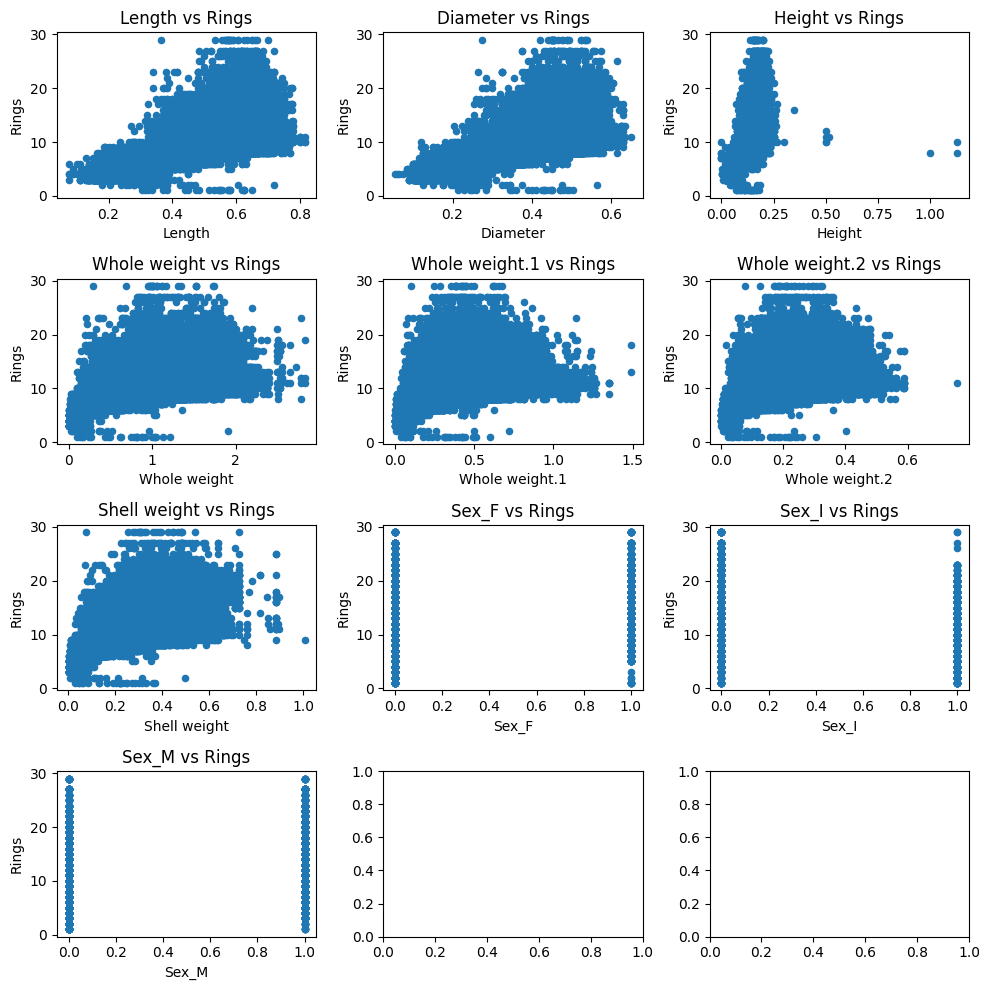

In [39]:
columns = train.columns.drop('Rings')

# Create a grid of subplots (5 rows x 4 columns) for the 20 plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flatten()

# Loop through each column and create a scatter plot against the target
for i, col in enumerate(columns):
    ax = axes[i]
    train.plot(x=col, y='Rings', kind='scatter', ax=ax)
    ax.set_title(f'{col} vs Rings')

# Adjust the layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

In [40]:
feature , lable = train[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
                            'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']],train["Rings"]

In [41]:
def feature_engineering(feature):
    feature["L/D"] = feature['Length']/feature["Diameter"]
    feature["D/H"] = feature["Diameter"]/feature["Height"]
    feature["weight_ratio1"] = feature["Whole weight"]/feature["Whole weight.1"]
    feature["weight_ratio2"] = feature["Whole weight"]/feature["Whole weight.2"]
    feature["weight_shell"] = feature["Whole weight"]/feature["Shell weight"]
    feature["logLength"] = np.log(feature["Length"])
    feature["logDiameter"] = np.log(feature["Diameter"])
    feature["logHeight"] = np.log(feature["Height"] + 1e-6)
    feature["logWhole weight"] = np.log(feature["Whole weight"])
    feature["logWhole weight.1"] = np.log(feature["Whole weight.1"])
    feature["logWhole weight.2"] = np.log(feature["Whole weight.2"])
    feature["logShell weight"] = np.log(feature["Shell weight"])
    feature["Vol"] = feature["Length"] * feature["Diameter"] * feature["Height"]
    r = feature["Diameter"] / 2
    feature["SurfArea"] = 2 * np.pi * r * feature["Height"] + 2 * np.pi * r**2
    feature["Density"] = feature["Whole weight"] / feature["Vol"]
    feature["Meat/Shell"] = feature["Whole weight.2"] / feature["Shell weight"]
    feature["Viscera/Meat"] = feature["Whole weight.1"] / feature["Whole weight.2"]
    feature["Total/Shell"] = feature["Whole weight"] / feature["Shell weight"]


    return feature
test = feature_engineering(test)
feature = feature_engineering(feature)

In [68]:
feature = feature.replace([np.inf, -np.inf], np.nan)
#y_train = y_train.replace([np.inf, -np.inf], np.nan)

In [69]:
feature[np.isinf(feature['D/H'])]         # D/H , Density

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M,...,logWhole weight,logWhole weight.1,logWhole weight.2,logShell weight,Vol,SurfArea,Density,Meat/Shell,Viscera/Meat,Total/Shell
id,,,,,,,,,,,,,,,,,,,,,


In [82]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

In [71]:
x_train,x_test,y_train,y_test = train_test_split(feature,lable,test_size=0.2,random_state=37)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72492, 28), (18123, 28), (72492,), (18123,))

In [72]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
y_pred = model.predict(x_test)
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.5653838092403776


In [78]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"MSE for {model.__class__.__name__}: {mse}")

models = [
    XGBRegressor(random_state=42),
    CatBoostRegressor(verbose=0, random_seed=42),
    LGBMRegressor(verbosity=-1, random_state=42)
]
for model in models:
    train_and_evaluate(model, x_train, y_train, x_test, y_test)

MSE for XGBRegressor: 3.5653838092403776
MSE for CatBoostRegressor: 3.4147633656044993
MSE for LGBMRegressor: 3.456684477915941


In [84]:
# Define parameter grids for each model
catboost_param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

lgbm_param_grid = {
    'num_leaves': [20, 31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, -1],
    'min_child_samples': [10, 20, 30]
}

xgb_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 500],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize models with early stopping
models = {
    'CatBoost': CatBoostRegressor(verbose=0, random_seed=42, early_stopping_rounds=50),
    'LightGBM': LGBMRegressor(verbosity=-1, random_state=42),
    'XGBoost': XGBRegressor(random_state=42, early_stopping_rounds=50)
}

# Parameter grids mapping
param_grids = {
    'CatBoost': catboost_param_grid,
    'LightGBM': lgbm_param_grid,
    'XGBoost': xgb_param_grid
}

# Function to perform hyperparameter tuning and evaluation
def optimize_model(model_name, model, param_grid, x_train, y_train, x_test, y_test):
    print(f"Optimizing {model_name}...")
    
    # Configure RandomizedSearchCV
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=10,  # Number of parameter combinations to try
        scoring='neg_mean_squared_error',
        cv=3,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available CPU cores
        random_state=42
    )
    
    # Fit the search (use eval_set for early stopping in CatBoost and XGBoost)
    if model_name in ['CatBoost', 'XGBoost']:
        model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)
    else:  # LightGBM handles eval_set internally via fit
        model.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric='mse')
    
    search.fit(x_train, y_train)
    
    # Best parameters and score
    print(f"Best parameters for {model_name}: {search.best_params_}")
    print(f"Best CV MSE: {-search.best_score_}")
    
    # Evaluate on test set
    best_model = search.best_estimator_
    y_pred = best_model.predict(x_test)
    test_mse = mean_squared_error(y_test, y_pred)
    print(f"Test MSE for {model_name}: {test_mse}\n")
    
    return best_model

# Optimize and evaluate each model
best_models = {}
for model_name, model in models.items():
    best_models[model_name] = optimize_model(
        model_name, model, param_grids[model_name], x_train, y_train, x_test, y_test
    )

# Example: Access the best CatBoost model
# best_catboost = best_models['CatBoost']

Optimizing CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 8, 'border_count': 128}
Best CV MSE: 3.4381753111248194
Test MSE for CatBoost: 3.449343499001744

Optimizing LightGBM...
Best parameters for LightGBM: {'num_leaves': 50, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.05}
Best CV MSE: 3.4091919492233376
Test MSE for LightGBM: 3.450215475383632

Optimizing XGBoost...


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/training.py", line 182, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/callback.py", line 241, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/callback.py", line 241, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/callback.py", line 426, in after_iteration
    raise ValueError(msg)
ValueError: Must have at least 1 validation dataset for early stopping.
